<a href="https://colab.research.google.com/github/slayer199/IMK/blob/main/Pertemuan_9_Forum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# SISTEM BASIS DATA PERPUSTAKAAN
# Menggunakan SQLite di Google Colab

import sqlite3
import pandas as pd

# Buat koneksi ke database (file sementara di Colab)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# 1. Membuat tabel: buku, anggota, peminjaman
cursor.execute("""
CREATE TABLE buku (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    judul TEXT NOT NULL,
    penulis TEXT,
    tahun INTEGER
);
""")
cursor.execute("""
CREATE TABLE anggota (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nama TEXT NOT NULL,
    email TEXT
);
""")
cursor.execute("""
CREATE TABLE peminjaman (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_anggota INTEGER,
    id_buku INTEGER,
    tgl_pinjam TEXT,
    tgl_kembali TEXT,
    FOREIGN KEY (id_anggota) REFERENCES anggota(id),
    FOREIGN KEY (id_buku) REFERENCES buku(id)
);
""")
conn.commit()

# 2. Tambahkan 5 data buku dan 3 data anggota
buku_data = [
    ("Laskar Pelangi", "Andrea Hirata", 2005),
    ("Bumi Manusia", "Pramoedya Ananta Toer", 1980),
    ("Negeri 5 Menara", "Ahmad Fuadi", 2009),
    ("Perahu Kertas", "Dee Lestari", 2008),
    ("Ayat-Ayat Cinta", "Habiburrahman El Shirazy", 2004)
]
anggota_data = [
    ("Andi Setiawan", "andi@gmail.com"),
    ("Budi Santoso", "budi@gmail.com"),
    ("Citra Lestari", "citra@gmail.com")
]
cursor.executemany("INSERT INTO buku (judul, penulis, tahun) VALUES (?, ?, ?);", buku_data)
cursor.executemany("INSERT INTO anggota (nama, email) VALUES (?, ?);", anggota_data)
conn.commit()

# 3. Lakukan 4 transaksi peminjaman
peminjaman_data = [
    (1, 1, "2025-11-01", "2025-11-05"),  # Andi meminjam Laskar Pelangi
    (2, 2, "2025-11-02", None),          # Budi meminjam Bumi Manusia (belum dikembalikan)
    (3, 3, "2025-11-03", "2025-11-07"),  # Citra meminjam Negeri 5 Menara
    (1, 4, "2025-11-04", "2025-11-10")   # Andi meminjam Perahu Kertas
]
cursor.executemany("""
INSERT INTO peminjaman (id_anggota, id_buku, tgl_pinjam, tgl_kembali)
VALUES (?, ?, ?, ?);
""", peminjaman_data)
conn.commit()

# 4. Tampilkan daftar peminjaman lengkap (JOIN)
print("=== DAFTAR PEMINJAMAN LENGKAP ===")
query_join = """
SELECT
    peminjaman.id,
    anggota.nama AS nama_anggota,
    buku.judul AS judul_buku,
    peminjaman.tgl_pinjam,
    peminjaman.tgl_kembali
FROM peminjaman
JOIN anggota ON peminjaman.id_anggota = anggota.id
JOIN buku ON peminjaman.id_buku = buku.id;
"""
df_join = pd.read_sql_query(query_join, conn)
display(df_join)

# 5. Hitung jumlah total buku yang dipinjam oleh masing-masing anggota
print("=== JUMLAH BUKU DIPINJAM PER ANGGOTA ===")
query_group = """
SELECT
    anggota.nama AS nama_anggota,
    COUNT(peminjaman.id_buku) AS total_buku_dipinjam
FROM peminjaman
JOIN anggota ON peminjaman.id_anggota = anggota.id
GROUP BY anggota.nama;
"""
df_group = pd.read_sql_query(query_group, conn)
display(df_group)

# Tutup koneksi
conn.close()


=== DAFTAR PEMINJAMAN LENGKAP ===


,id,nama_anggota,judul_buku,tgl_pinjam,tgl_kembali
0,1,Andi Setiawan,Laskar Pelangi,2025-11-01,2025-11-05
1,2,Budi Santoso,Bumi Manusia,2025-11-02,None
2,3,Citra Lestari,Negeri 5 Menara,2025-11-03,2025-11-07
3,4,Andi Setiawan,Perahu Kertas,2025-11-04,2025-11-10


=== JUMLAH BUKU DIPINJAM PER ANGGOTA ===


,nama_anggota,total_buku_dipinjam
0,Andi Setiawan,2
1,Budi Santoso,1
2,Citra Lestari,1


=== DataFrame Peminjaman ===


,id,nama_anggota,judul_buku,tgl_pinjam,tgl_kembali
0,1,Andi Setiawan,Laskar Pelangi,2025-11-01,2025-11-05
1,2,Budi Santoso,Bumi Manusia,2025-11-02,None
2,3,Citra Lestari,Negeri 5 Menara,2025-11-03,2025-11-07
3,4,Andi Setiawan,Perahu Kertas,2025-11-04,2025-11-10



=== Data dengan Durasi Peminjaman ===


,id,nama_anggota,judul_buku,tgl_pinjam,tgl_kembali,durasi_hari
0,1,Andi Setiawan,Laskar Pelangi,2025-11-01,2025-11-05,4.0
1,2,Budi Santoso,Bumi Manusia,2025-11-02,NaT,NaN
2,3,Citra Lestari,Negeri 5 Menara,2025-11-03,2025-11-07,4.0
3,4,Andi Setiawan,Perahu Kertas,2025-11-04,2025-11-10,6.0



Statistik Durasi Peminjaman:


,durasi_hari
count,3.000000
mean,4.666667
std,1.154701
min,4.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,6.000000



Peminjaman yang belum dikembalikan:


,id,nama_anggota,judul_buku,tgl_pinjam,tgl_kembali,durasi_hari
1,2,Budi Santoso,Bumi Manusia,2025-11-02,NaT,NaN


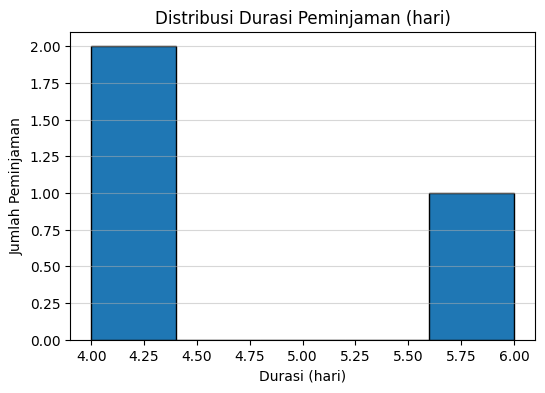

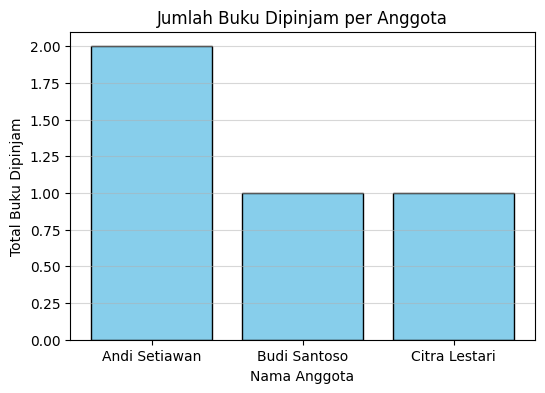

In [6]:
# ANALISIS & VISUALISASI DATA PEMINJAMAN (MATPLOTLIB SAJA)

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Koneksi ke database SQLite
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Buat tabel dan isi data
cursor.execute("""
CREATE TABLE buku (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    judul TEXT,
    penulis TEXT,
    tahun INTEGER
);
""")
cursor.execute("""
CREATE TABLE anggota (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nama TEXT,
    email TEXT
);
""")
cursor.execute("""
CREATE TABLE peminjaman (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_anggota INTEGER,
    id_buku INTEGER,
    tgl_pinjam TEXT,
    tgl_kembali TEXT,
    FOREIGN KEY (id_anggota) REFERENCES anggota(id),
    FOREIGN KEY (id_buku) REFERENCES buku(id)
);
""")

# Tamba data buku dan anggota
buku_data = [
    ("Laskar Pelangi", "Andrea Hirata", 2005),
    ("Bumi Manusia", "Pramoedya Ananta Toer", 1980),
    ("Negeri 5 Menara", "Ahmad Fuadi", 2009),
    ("Perahu Kertas", "Dee Lestari", 2008),
    ("Ayat-Ayat Cinta", "Habiburrahman El Shirazy", 2004)
]
anggota_data = [
    ("Andi Setiawan", "andi@gmail.com"),
    ("Budi Santoso", "budi@gmail.com"),
    ("Citra Lestari", "citra@gmail.com")
]
peminjaman_data = [
    (1, 1, "2025-11-01", "2025-11-05"),
    (2, 2, "2025-11-02", None),
    (3, 3, "2025-11-03", "2025-11-07"),
    (1, 4, "2025-11-04", "2025-11-10")
]
cursor.executemany("INSERT INTO buku (judul, penulis, tahun) VALUES (?, ?, ?);", buku_data)
cursor.executemany("INSERT INTO anggota (nama, email) VALUES (?, ?);", anggota_data)
cursor.executemany("""
INSERT INTO peminjaman (id_anggota, id_buku, tgl_pinjam, tgl_kembali)
VALUES (?, ?, ?, ?);
""", peminjaman_data)
conn.commit()

# 1. Buat DataFrame dari hasil JOIN
query = """
SELECT
    p.id,
    a.nama AS nama_anggota,
    b.judul AS judul_buku,
    p.tgl_pinjam,
    p.tgl_kembali
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
JOIN buku b ON p.id_buku = b.id;
"""
df = pd.read_sql_query(query, conn)
print("=== DataFrame Peminjaman ===")
display(df)

# 2. Eksplorasi Data: Durasi Peminjaman
df["tgl_pinjam"] = pd.to_datetime(df["tgl_pinjam"])
df["tgl_kembali"] = pd.to_datetime(df["tgl_kembali"])

# Hitung durasi dalam hari
df["durasi_hari"] = (df["tgl_kembali"] - df["tgl_pinjam"]).dt.days

print("\n=== Data dengan Durasi Peminjaman ===")
display(df)

# Statistik deskriptif
print("\nStatistik Durasi Peminjaman:")
display(df["durasi_hari"].describe())

# Cek peminjaman yang belum dikembalikan
belum_kembali = df[df["tgl_kembali"].isnull()]
print("\nPeminjaman yang belum dikembalikan:")
display(belum_kembali)

# 3. Visualisasi

# a. Histogram durasi peminjaman
durasi = df["durasi_hari"].dropna()
plt.figure(figsize=(6,4))
plt.hist(durasi, bins=5, edgecolor="black")
plt.title("Distribusi Durasi Peminjaman (hari)")
plt.xlabel("Durasi (hari)")
plt.ylabel("Jumlah Peminjaman")
plt.grid(axis='y', alpha=0.5)
plt.show()

# b. Diagram batang: jumlah buku dipinjam per anggota
jumlah_buku = df.groupby("nama_anggota")["judul_buku"].count()

plt.figure(figsize=(6,4))
plt.bar(jumlah_buku.index, jumlah_buku.values, color="skyblue", edgecolor="black")
plt.title("Jumlah Buku Dipinjam per Anggota")
plt.xlabel("Nama Anggota")
plt.ylabel("Total Buku Dipinjam")
plt.grid(axis='y', alpha=0.5)
plt.show()

# Tutup koneksi
conn.close()
